# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.410347e+01     1.624468e+01
 * time: 0.003039836883544922
     1     6.368490e+01     1.253134e+01
 * time: 0.008939981460571289
     2     5.741571e+01     1.676497e+01
 * time: 0.022531986236572266
     3     4.275783e+01     1.139997e+01
 * time: 0.0408778190612793
     4     3.487506e+01     1.017819e+01
 * time: 0.05848383903503418
     5     1.490009e+01     3.157736e+00
 * time: 0.14609384536743164
     6     1.138340e+01     3.520194e+00
 * time: 0.15999794006347656
     7     9.900684e+00     2.191030e+00
 * time: 0.17305684089660645
     8     9.126685e+00     3.320207e+00
 * time: 0.18350481986999512
     9     8.811054e+00     3.575682e+00
 * time: 0.19388580322265625
    10     8.504275e+00     3.066914e+00
 * time: 0.20434999465942383
    11     8.062185e+00     1.735209e+00
 * time: 0.21474194526672363
    12     7.559192e+00     1.312268e+00
 * time: 0.22731399536132812
    13     7.172199e+00     1.502411e+00
 * tim

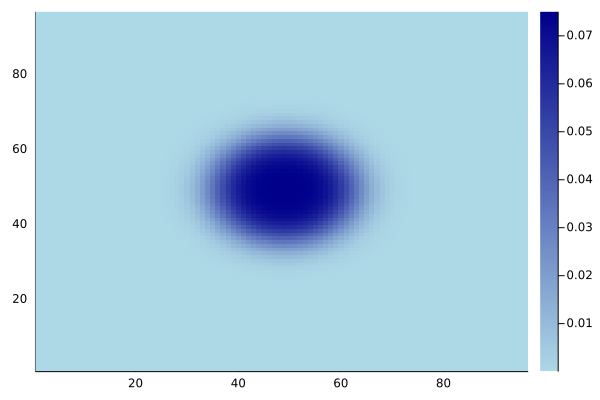

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)

# Parameters
Ecut = 50
n_electrons = 1
β = 5

terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
display(heatmap(scfres.ρ[:, :, 1, 1], c=:blues))